<a href="https://colab.research.google.com/github/samiha-mahin/Data-Analysis/blob/main/Handling_Missing_Values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mean Median Imputation
For imputing numerical data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('titanic_toy.csv')

In [4]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [5]:
df.isnull().mean()

,0
Age,0.198653
Fare,0.050505
Family,0.000000
Survived,0.000000


In [6]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [8]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [9]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [10]:
trf.fit(X_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [11]:
trf.named_transformers_['imputer1'].statistics_

array([28.75])

In [12]:
trf.named_transformers_['imputer2'].statistics_

array([32.61759689])

In [13]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [14]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])

<ipython-input-16-0dd95dcc1dff>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_train_df['Age'], shade=True, color='blue', label='Age')


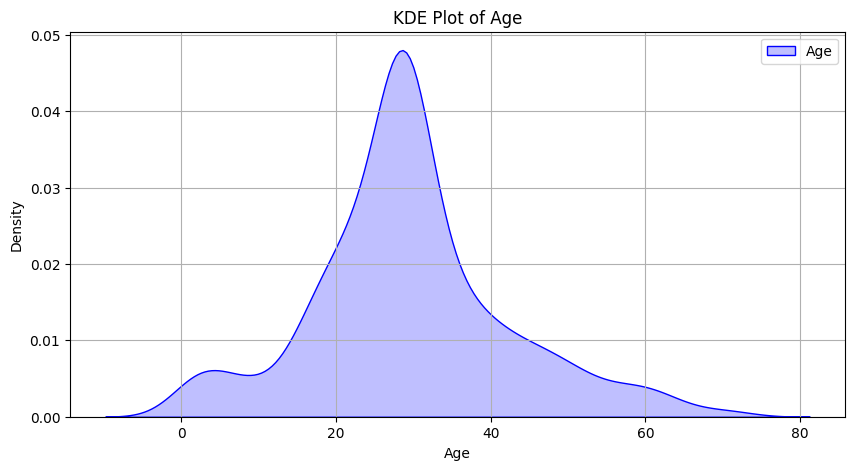

<ipython-input-16-0dd95dcc1dff>:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_train_df['Fare'], shade=True, color='green', label='Fare')


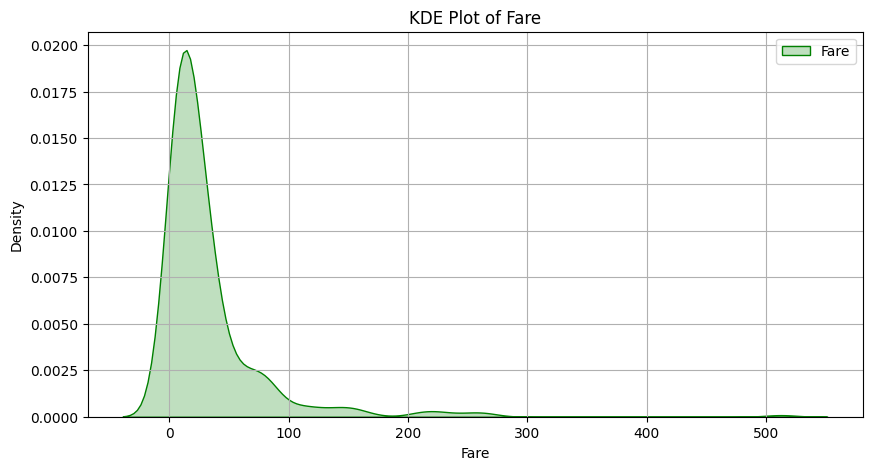

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert X_train (NumPy array) to DataFrame with proper column names
X_train_df = pd.DataFrame(X_train, columns=['Age', 'Fare', 'Other'])

# KDE plot for 'Age'
plt.figure(figsize=(10, 5))
sns.kdeplot(X_train_df['Age'], shade=True, color='blue', label='Age')
plt.title('KDE Plot of Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

# KDE plot for 'Fare'
plt.figure(figsize=(10, 5))
sns.kdeplot(X_train_df['Fare'], shade=True, color='green', label='Fare')
plt.title('KDE Plot of Fare')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()
